In [1]:
import cv2
import matplotlib.pyplot as plt
import openface
import os
from IPython import display
import pickle
import index

%matplotlib inline

In [7]:
class Video:
    def __init__(self, path):
        self.vidcap = cv2.VideoCapture(path)
        self.fps = self.vidcap.get(cv2.cv.CV_CAP_PROP_FPS)
        self.total_frames = self.vidcap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT)
        self.length = self.total_frames / self.fps
    
    def read(self):
        success, image = self.vidcap.read()
        if success:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return success, image
    
    def delayed_read(self, skip_seconds):
        skip_frames = int(self.fps * skip_seconds)
        success = True
        while success and skip_frames > 0:
            success, image = self.read()
            skip_frames -= 1
        return self.read()
    
def mark_image_with_rectangles(image, rectangles):
    image = image.copy()
    for rect in rectangles:
        pt1 = (rect.left(), rect.top())
        pt2 = (rect.right(), rect.bottom())
        cv2.rectangle(image, pt1, pt2, (0, 255, 0), 2)
    return image

def extract_frames_and_save(path, save_to, seconds, verbose=100):
    basename = os.path.splitext(os.path.basename(path))[0]
    video = Video(path)
    success, image = video.delayed_read(seconds)
    count = 0
    while success:
        plt.imsave(save_to+'/'+basename+"_delay{0}_frame{1:03d}.png".format(seconds, count), image)
        count += 1
        if verbose and count % verbose == 0:
            print count
        
        success, image = video.delayed_read(seconds)
    return count

In [35]:
nnet = openface.TorchNeuralNet('../openface/models/openface/nn4.small2.v1.t7')

In [41]:
nnet.forward(alignedFace)

array([ 0.03190468,  0.13523668,  0.14432675, -0.10680132, -0.01125908,
        0.05860381, -0.08322007, -0.00612643, -0.17711291,  0.0479949 ,
        0.11034456, -0.06890734,  0.09987785,  0.10661661,  0.1751539 ,
        0.08125036,  0.00377493,  0.0567915 , -0.05660782, -0.04847584,
        0.10249794,  0.15326259,  0.08372355,  0.01583746,  0.03326614,
        0.05400342,  0.0811949 ,  0.01087352,  0.10376918,  0.07047829,
       -0.07373463,  0.01668787,  0.08762345,  0.1253532 ,  0.01143307,
        0.02909054,  0.02377247,  0.0922825 ,  0.03380612,  0.04263569,
       -0.06985701, -0.07824955,  0.06031314,  0.07358223, -0.09424989,
        0.12036028,  0.11767374, -0.02248818, -0.22907661, -0.03478177,
        0.15913393,  0.07419839, -0.12091378,  0.06838186,  0.02572417,
        0.04053974,  0.03480494,  0.01168055,  0.02864408, -0.0403975 ,
       -0.07041359, -0.10864933, -0.01861425,  0.04218328,  0.06461   ,
        0.00875584, -0.07178882,  0.10783152, -0.02712809,  0.17

In [25]:
align = openface.AlignDlib('../openface/models/dlib/shape_predictor_68_face_landmarks.dat')


autodizel_delay10_frame204.png -- check bbs here!!

autodizel_delay10_frame216.png

knyaz_vladimir_delay5_frame125.png

verit_gramoty_delay10_frame008.png

verit_gramoty_delay10_frame093.png

2


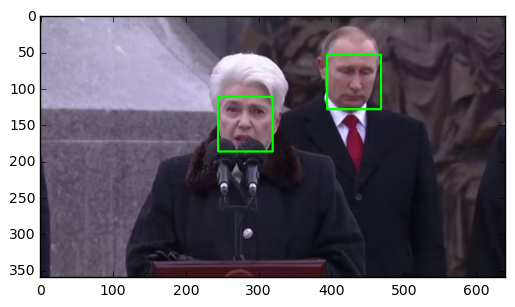

In [38]:
image = cv2.imread('extracted_frames/knyaz_vladimir_delay5_frame125.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rectangles = list(align.getAllFaceBoundingBoxes(image))
print len(rectangles)
marked_image = mark_image_with_rectangles(image, rectangles)
plt.imshow(marked_image)

In [39]:
bb = align.getLargestFaceBoundingBox(image)
alignedFace = align.align(96, image, bb, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)

In [223]:
extract_frames_and_save('videos/autodizel.mp4', 'extracted_frames', 10, verbose=100)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


error: /root/ocv-tmp/opencv-2.4.11/modules/imgproc/src/color.cpp:3650: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [225]:
video = Video('videos/knyaz_vladimir.mp4')
print video.length

931.08


In [231]:
extract_frames_and_save('videos/knyaz_vladimir.mp4', 'extracted_frames', 5, verbose=100)

100


184

In [232]:
video = Video('videos/neftyanoe_mesto.mp4')
print video.length

542.84


In [233]:
extract_frames_and_save('videos/neftyanoe_mesto.mp4', 'extracted_frames', 5, verbose=50)

50
100


107

In [234]:
video = Video('videos/verit_gramoty.mp4')
print video.length

1852.2


In [235]:
extract_frames_and_save('videos/verit_gramoty.mp4', 'extracted_frames', 10, verbose=10)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180


184

In [5]:
fnames = os.listdir('extracted_frames/')

In [8]:
labeled = {}

In [9]:
json.dump(labeled)

'{}'

In [256]:
len(labeled)

465

In [13]:
# with open('labeled.pkl', 'rb') as f:
#     ll = pickle.load(f)

876 verit_gramoty_delay10_frame183.png
Ratio of ones:	0.51983
Total labeled:	705


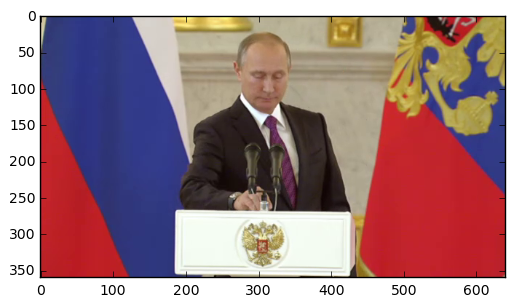

1


In [22]:
for i, fname in list(enumerate(fnames))[855:]:
    if i % 10 == 0:
        with open('labeled.pkl', 'wb') as f:
            pickle.dump(labeled, f)
            print "SAVED!"
    print i, fname
    print "Ratio of ones:\t{0:.5f}".format(float(sum(labeled.values()))/(len(labeled)+1))
    print "Total labeled:\t{0}".format(len(labeled))
    img = cv2.imread('extracted_frames/'+fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.show()
    
    label = input()
    if label != 2:
        labeled[fname]=label
    display.clear_output(wait=True)

In [23]:
with open('labeled.pkl', 'wb') as f:
    pickle.dump(labeled, f)

In [24]:
len(labeled)

706

**autodizel_delay10_frame204.png -- check bbs here!!**

autodizel_delay10_frame216.png

knyaz_vladimir_delay5_frame125.png

verit_gramoty_delay10_frame008.png

verit_gramoty_delay10_frame093.png